In [172]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

# Bring in files and load into dataframe

In [173]:
states = input("Enter state: ")
states = states.lower()

Enter state: virginia


In [174]:
path = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID-19.io/data/{states}_data/{states}_master_file.csv"

In [175]:
master_df = pd.read_csv(path)
master_df = master_df[master_df.County != 'Unassigned']

# Format dataframe

In [176]:
import datetime as dt
master_df['Date'] = master_df['Date'].apply(pd.to_datetime)
master_df['Date'] = master_df['Date'].dt.strftime('%m/%d')

In [177]:
master_df.sort_values(by=['County','Date'], inplace=True)
master_df = master_df.drop(columns=['FIPS', 'State','Country','lat','lon','Active','Combined_Key'])
master_df = master_df.drop(columns=['Confirmed.1'])
master_df = master_df.dropna()

# Pivot dataframe for confirmed cases

In [178]:
try:
    master_df_confirmed = master_df.pivot(index=master_df.columns[0],
                  columns=master_df.columns[1],
                  values= master_df.columns[2])
except:
    master_df_confirmed = master_df.pivot_table(index='County', columns='Date', values='Confirmed')
dates_confirmed = list(master_df_confirmed.columns)
master_df_confirmed = master_df_confirmed.sort_values(by=dates_confirmed[-1], ascending=False)
master_df_confirmed = master_df_confirmed.dropna()
master_df_confirmed=master_df_confirmed[master_df_confirmed[dates_confirmed[-1]]!=0].dropna()
master_df_confirmed

Date,03/22,03/23,03/24,03/25,03/26,03/27,03/28,03/29,03/30,03/31
County,,,,,,,,,,
Fairfax,31.0,43.0,46.0,76.0,79.0,124.0,156.0,188.0,224.0,244.0
Arlington,26.0,34.0,36.0,46.0,54.0,63.0,75.0,84.0,86.0,104.0
Prince William,18.0,18.0,23.0,32.0,36.0,44.0,56.0,72.0,79.0,94.0
James City,32.0,34.0,37.0,41.0,49.0,55.0,65.0,70.0,73.0,89.0
Loudoun,15.0,15.0,18.0,20.0,28.0,43.0,54.0,61.0,61.0,87.0
...,...,...,...,...,...,...,...,...,...,...
Northampton,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Fredericksburg,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Page,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Matplotlib for confirmed cases

In [179]:
filter_list = master_df_confirmed[dates_confirmed[-1]]
li_1 = []
li_5000 = []
li_200 = []
li_50 = []
li_min = []
li_zero = []
count = 0
for i in filter_list:
    if i == 0:
        li_zero.append(master_df_confirmed.iloc[count])
    elif i <= 10:
        li_min.append(master_df_confirmed.iloc[count])
    elif i <= 50:
        li_50.append(master_df_confirmed.iloc[count])
    elif i <= 300:
        li_200.append(master_df_confirmed.iloc[count])
    elif i <= 5000:
        li_5000.append(master_df_confirmed.iloc[count])
    else:
        li_1.append(master_df_confirmed.iloc[count])
    
        
    count+=1

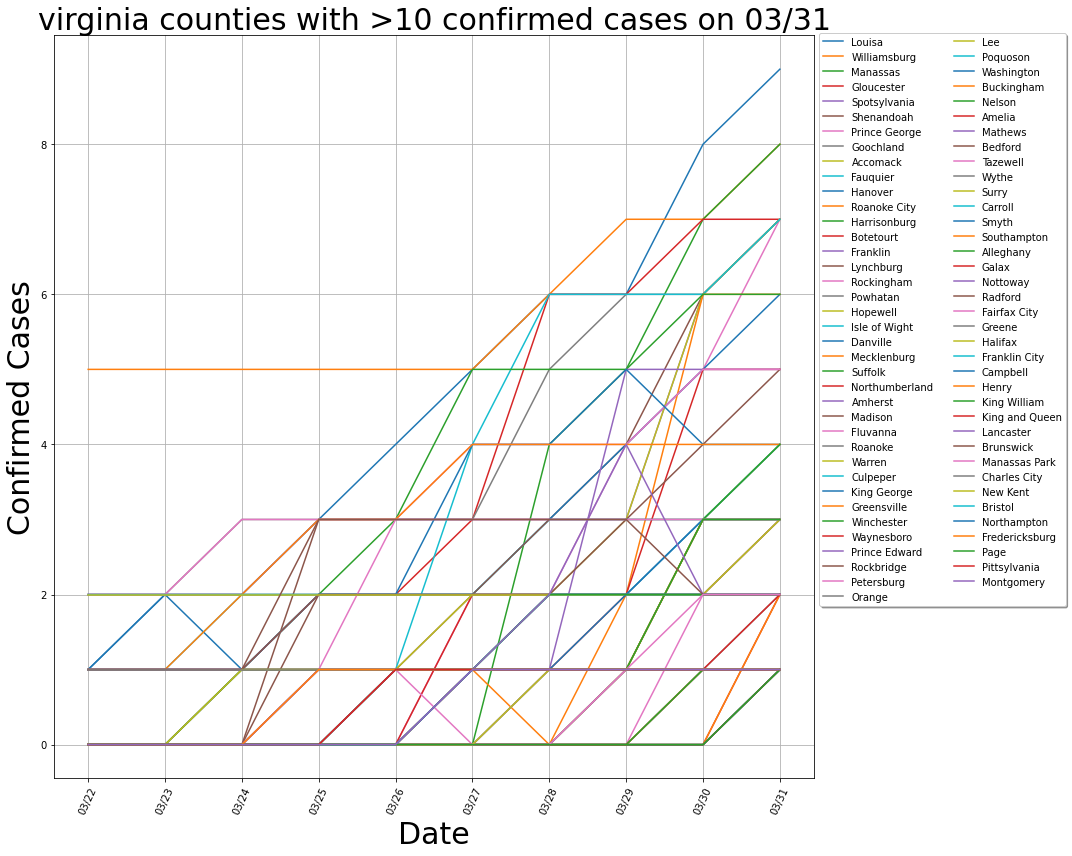

In [180]:
if len(li_min) != 0:
    plt.figure(figsize=(15,12))
    for i in li_min:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
    plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(rotation=65)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_1.png',dpi=200)

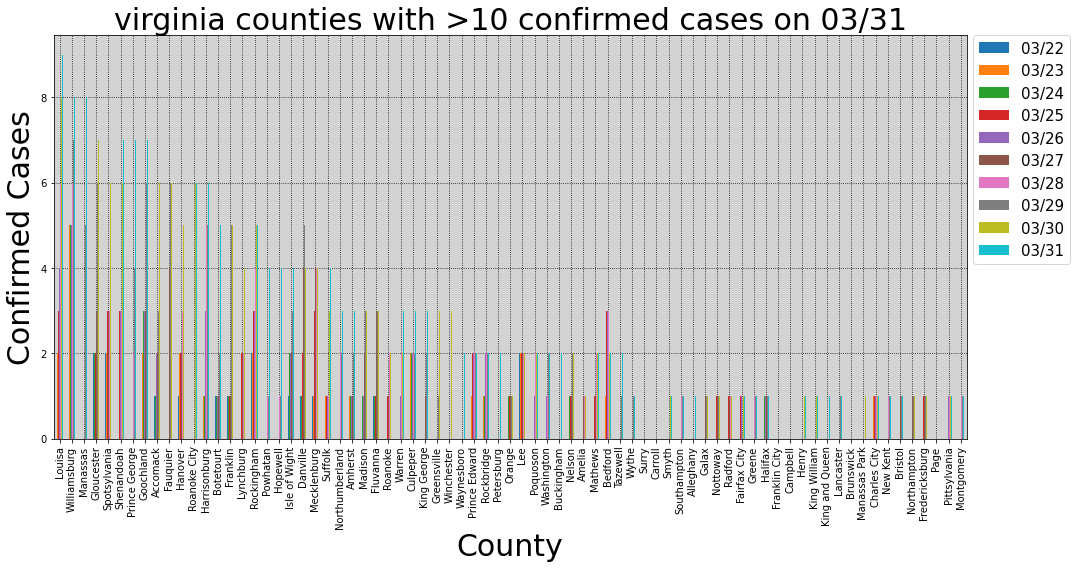

In [181]:
if len(li_min) != 0:
    li_min_df = pd.DataFrame(li_min)
    neww = li_min_df.plot.bar(figsize=(15,8),zorder=2)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    # plt.xticks(rotation=65)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed1.png',dpi=200)
    plt.show()

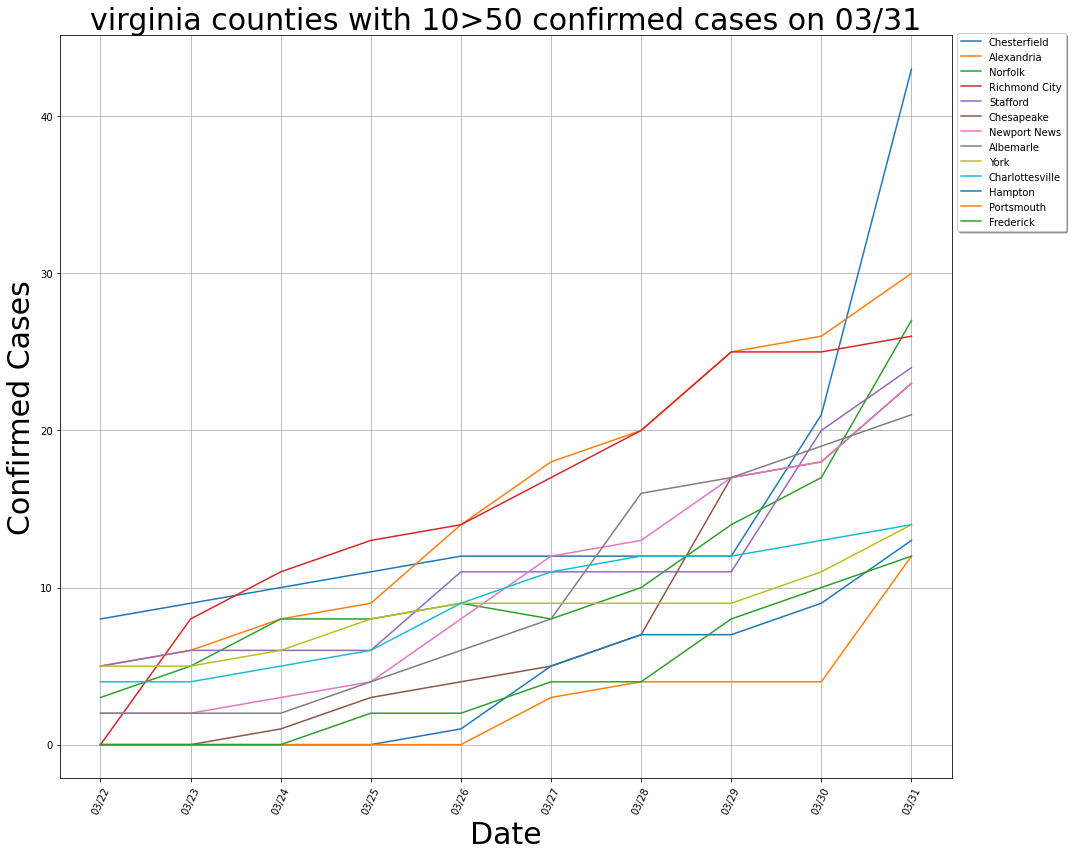

In [182]:
plt.figure(figsize=(15,12))
for i in li_50:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xticks(rotation=65)
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_2.png',dpi=200)

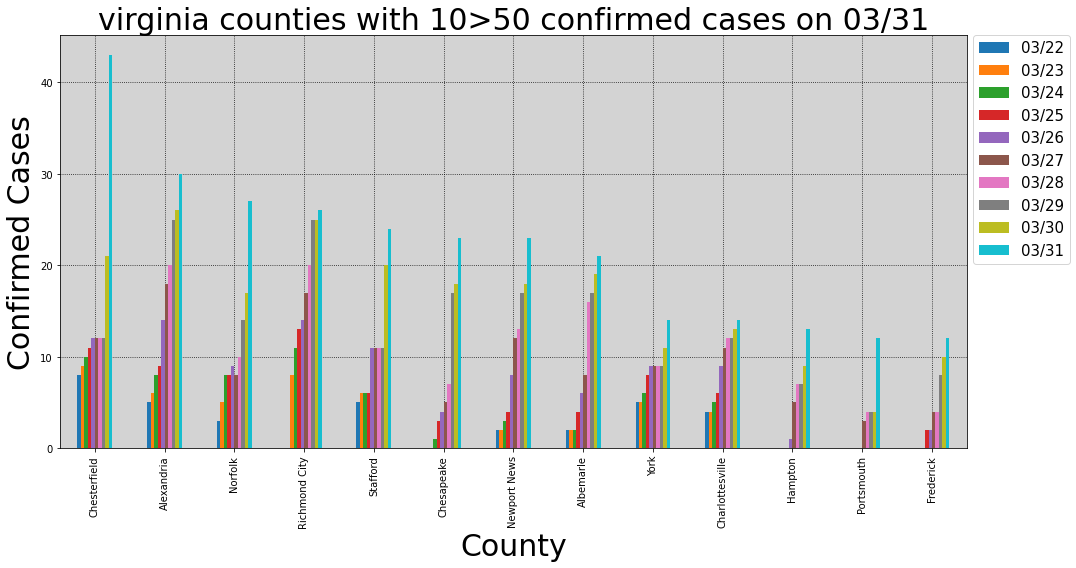

In [183]:
li_50_df = pd.DataFrame(li_50)
neww = li_50_df.plot.bar(figsize=(15,8),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xlabel("County",fontsize=30)
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
# plt.xticks(rotation=65)
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed2.png',dpi=200)
plt.show()

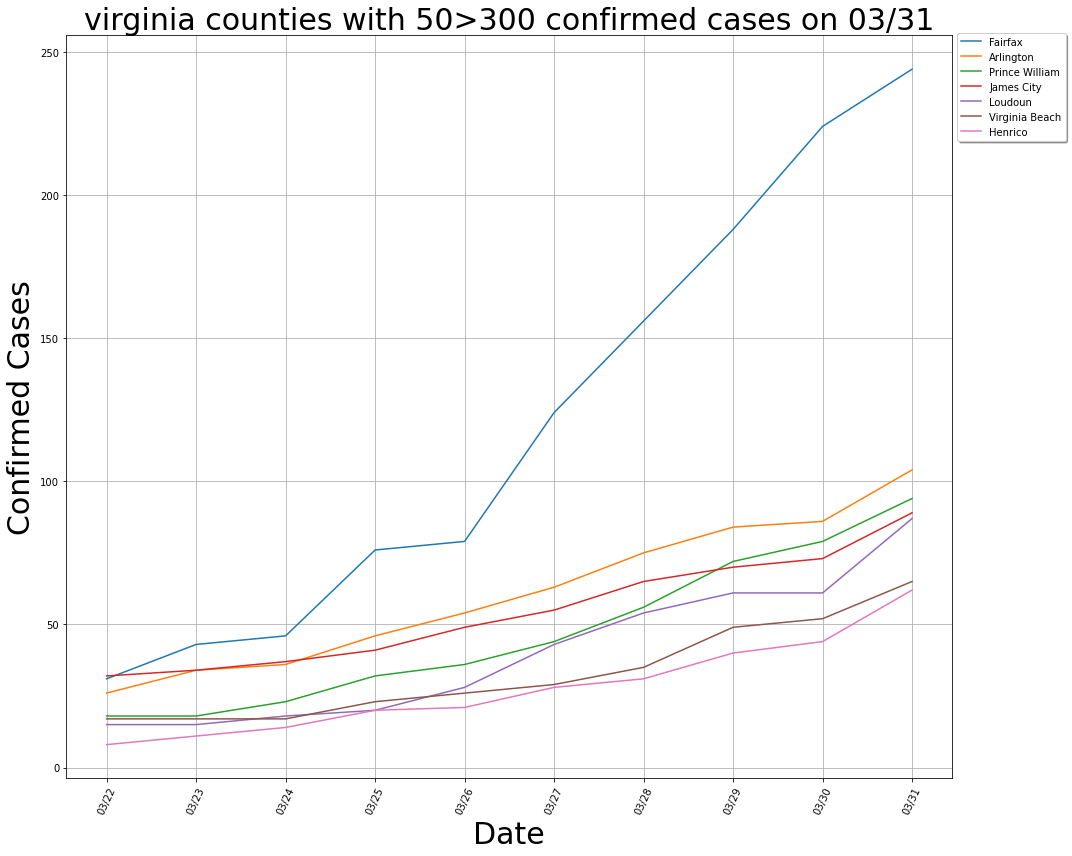

In [184]:
plt.figure(figsize=(15,12))
for i in li_200:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xticks(rotation=65)
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_3.png',dpi=200)

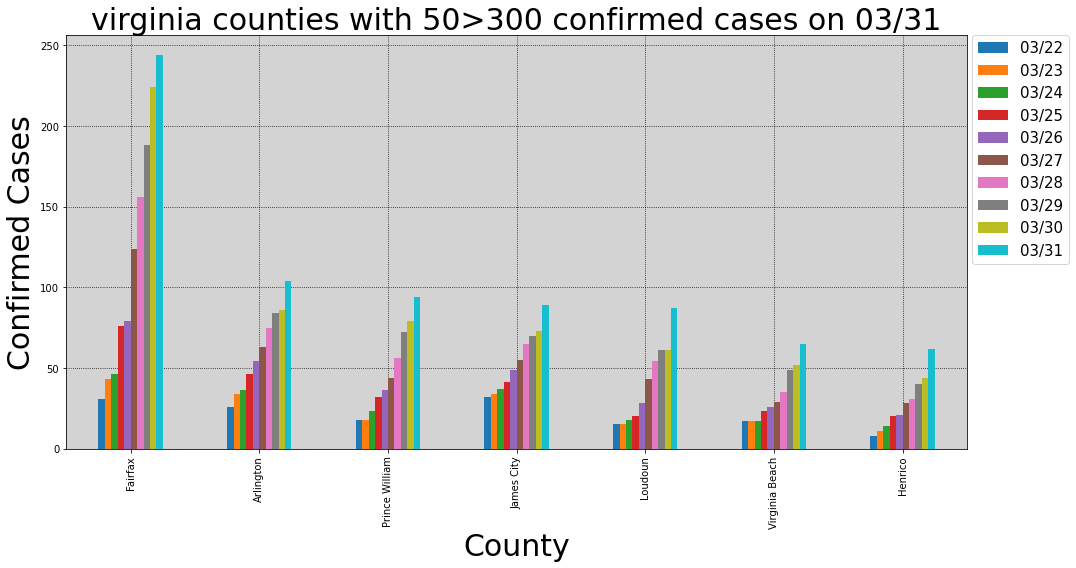

In [185]:
li_200_df = pd.DataFrame(li_200)
neww = li_200_df.plot.bar(figsize=(15,8),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xlabel("County",fontsize=30)
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
# plt.xticks(rotation=65)
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed3.png',dpi=200)
plt.show()

In [186]:
if len(li_5000) != 0:
    plt.figure(figsize=(15,12))
    for i in li_5000:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(rotation=65)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_4.png',dpi=200)

In [187]:
if len(li_5000) != 0:
    li_5000_df = pd.DataFrame(li_5000)
    neww = li_5000_df.plot.bar(figsize=(15,8),zorder=2)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
#     plt.xticks(rotation=65)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed4.png',dpi=200)
    plt.show()

In [188]:
if len(li_1) != 0:
    plt.figure(figsize=(15,12))
    for i in li_1:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(rotation=65)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_5.png',dpi=200)

In [189]:
if len(li_1) != 0:
    li_1_df = pd.DataFrame(li_1)
    neww = li_1_df.plot.bar(figsize=(15,8),zorder=2)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}",fontsize=30)
#     plt.xticks(rotation=65)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed5.png',dpi=200)
    plt.show()

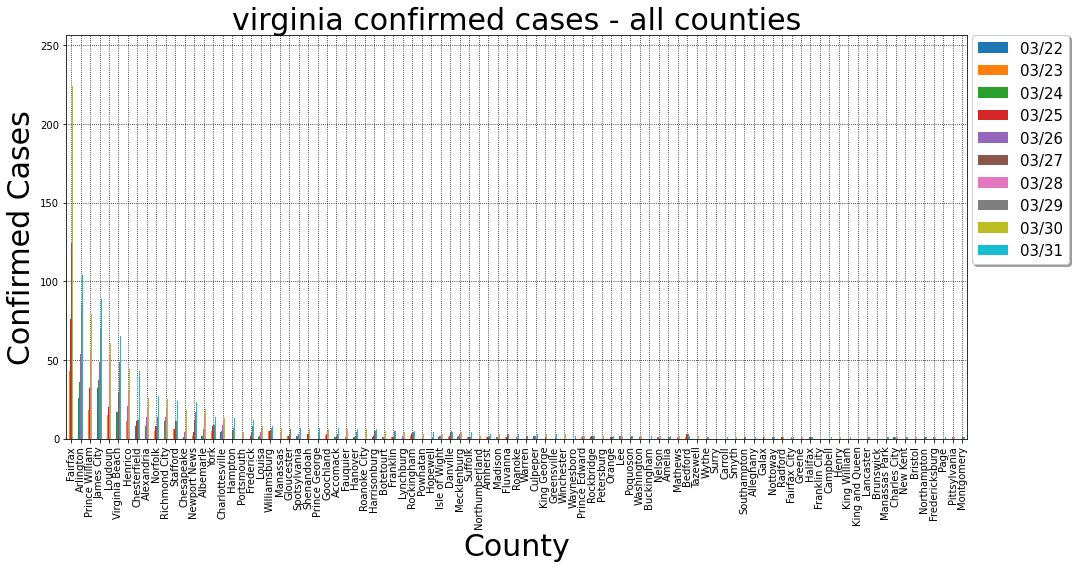

In [190]:
neww = master_df_confirmed.plot.bar(figsize=(15,8),zorder=2)
# neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True, shadow=True,fontsize=15)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xlabel("County",fontsize=30)
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} confirmed cases - all counties",fontsize=30)
# plt.xticks(rotation=65)
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed.png',dpi=200)
plt.show()